In [61]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [62]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [63]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [64]:
len(train_labels)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

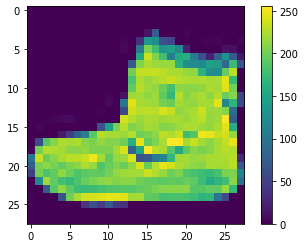

In [65]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [66]:
train_images = train_images / 255.0

test_images = test_images / 255.0

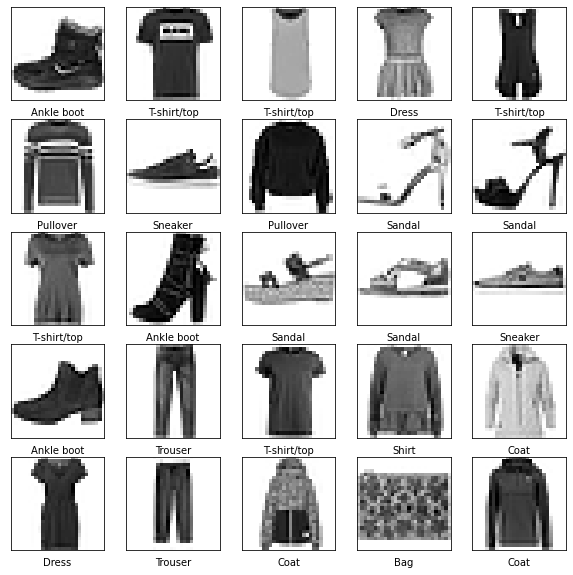

In [67]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [68]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.Conv2D(32, 3, activation ='relu')
        self.flatten = tf.keras.Flatten()
        self.d1 = tf.keras.Dense(128, activation = 'relu')
        self.d2 = tf.keras.Dense(10, activation = 'softmax')

def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [70]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5040 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3739 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3361 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3131 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2940 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2795 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2686 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2549 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.238

In [72]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3572 - accuracy: 0.8750 - 399ms/epoch - 1ms/step

Test accuracy: 0.875


In [73]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 589us/step


array([1.1913915e-07, 2.2613683e-07, 2.0723122e-07, 6.9062973e-09,
       1.3521693e-08, 7.0479116e-04, 1.0806626e-07, 6.1996575e-03,
       3.0156610e-08, 9.9309492e-01], dtype=float32)

In [74]:
np.argmax(predictions[0])

9

In [75]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

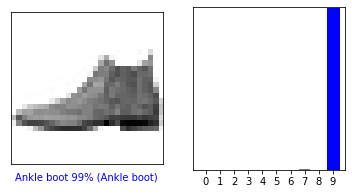

In [76]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

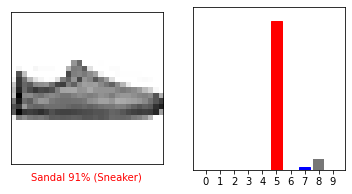

In [77]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

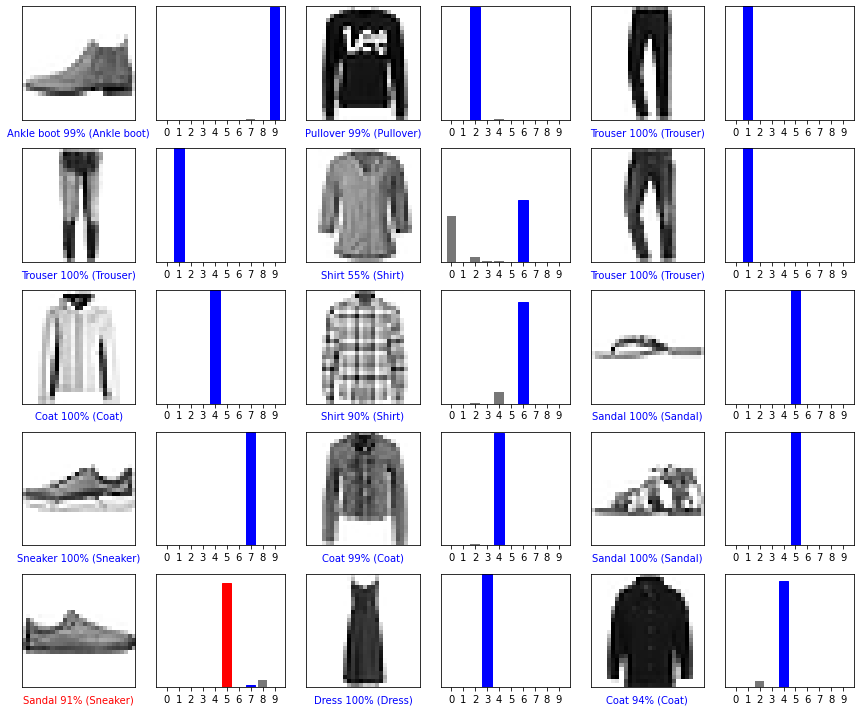

In [78]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [79]:
# Grab an image from the test dataset.
img = test_images[103]

print(img.shape)

(28, 28)


In [80]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [81]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 11ms/step
[[9.1381200e-02 1.3581579e-04 1.8242119e-01 6.4402684e-03 2.3321610e-02
  3.8288113e-07 6.9620699e-01 2.1863698e-06 8.4202809e-05 6.0640418e-06]]


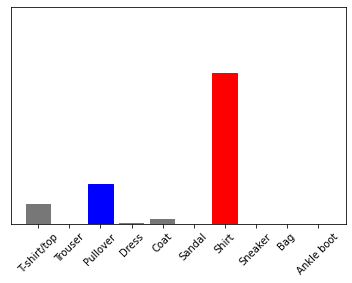

In [82]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [83]:
np.argmax(predictions_single[0])

6

In [84]:
# Save the trained model to a file
model.save('Trained_keras_model.h5')